In [1]:
"""
svm & smo
"""

'\nsvm & smo\n'

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sy

In [119]:
data =np.array([[1,2,1],[2,3,1],[3,3,1],[2,1,-1],[3,2,-1]],dtype='float')
X_train =data[:,:-1]
y_train =data[:,-1]
y_train =y_train[:,np.newaxis]
print(y_train.shape)

(5, 1)


In [123]:
Num_var =5
a =np.array(sy.symbols('a0:%d'%Num_var))
w ,i =sy.symbols('w i')
temp=np.multiply(y_train,X_train)
temp2=0
for i in range(5):
    temp2 =temp2+a[i]*temp[i,:]
w =temp2
temp3 =0
for i in range(5):
    temp3 =temp3 +w.dot(a[i]*y_train[i]*X_train[i,:])
temp4 =sy.Rational(1,2)*temp3
temp5 =0
for i in range(5):
    temp5 =temp5 +a[i]
expr =temp4 -temp5

der =[sy.diff(expr,a[i]) for i in range(5)]
#print(der)
hessian =[sy.diff(der[i],a) for i in range(5)]
from scipy.optimize import Bounds
bounds =Bounds([0,0,0,0,0],[np.inf,np.inf,np.inf,np.inf,np.inf])
from scipy.optimize import LinearConstraint
linear_constraint =LinearConstraint([y_train[0,0],y_train[1,0],y_train[2,0],y_train[3,0],y_train[4,0]],[0],[0])
print(linear_constraint)
my_func =sy.lambdify((a[0],a[1],a[2],a[3],a[4]),expr)
def my_function_v(x):
    return my_func(*tuple(x))
der_func =sy.lambdify((a[0],a[1],a[2],a[3],a[4]),der)
def my_der_func(x):
    return  np.asarray(der_func(*tuple(x)))
hessian_func =sy.lambdify((a[0],a[1],a[2],a[3],a[4]),hessian)

def my_hessian_func(x):
    return np.asarray(hessian_func(*tuple(x)))
def cons_f(x):
    return [x[0]**2+x[1]**2+x[2]**2+x[3]**2+x[4]**2]
def cons_J(x):
    return [2*x[0],2*x[1],2*x[2],2*x[3],2*x[4]]
def cons_H(x,v):
    return v[0]*2*np.eye(5)
from scipy.optimize import NonlinearConstraint
nonlinear_constraint =NonlinearConstraint(cons_f,0,np.inf,jac=cons_J,hess=cons_H)
print(res.x)
my_der_func(x0).shape
my_hessian_func(x0).shape

[5.00480122e-01 7.98932017e-04 1.99912136e+00 7.99930119e-04
 2.49960049e+00]


(5, 5)

In [126]:
from scipy.optimize import minimize
x0 =np.array([0.5,0.5,0.5,0.5,0.5])
print(x0.shape)
res =minimize(my_function_v,x0,method="trust-constr",jac=my_der_func,hess=my_hessian_func,
              constraints=[linear_constraint],
              options={'verbose':1},bounds=bounds)
val =res.x


(5,)
`gtol` termination condition is satisfied.
Number of iterations: 15, function evaluations: 13, CG iterations: 33, optimality: 4.40e-09, constraint violation: 1.24e-14, execution time: 0.034 s.


array([a0, a1, a2, a3, a4], dtype=object)

In [141]:
w_val =np.zeros((2,),dtype=float)
support_vectors =[]
for i in range(5):
    w_val =w_val +val[i]*y_train[i,0]*X_train[i,:]
    
for i in range(5):
    if(np.abs(val[i])>0.001):
        support_vectors.append(i)
        b_val =y_train[i,0]-w_val.dot(X_train[i,:])
print('w ',w_val,'\n','b ',b_val)
print(support_vectors)

w  [-1.00095925  2.00072023] 
 b  -1.998562716403974
[array([1., 2.]), array([3., 3.]), array([3., 2.])]


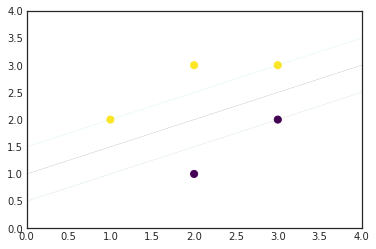

In [149]:
plt.xlim(0,4)
plt.ylim(0,4)
plt.style.use('seaborn-white')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train[:,0],s=50,cmap='viridis')
x_line =np.linspace(-2,5,1000)
y_line =-1*(w_val[0]/w_val[1])*x_line-(b_val/w_val[1])
plt.plot(x_line,y_line,'-k',linewidth=0.1)
y_line =-1*(w_val[0]/w_val[1])*x_line-((b_val+1)/w_val[1])
plt.plot(x_line,y_line,'--g',linewidth=0.1)
y_line =-1*(w_val[0]/w_val[1])*x_line-((b_val-1)/w_val[1])
plt.plot(x_line,y_line,'--c',linewidth=0.1)

In [104]:
#SMO
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sy

In [105]:
data =np.array([[1,2,1],[2,3,1],[3,3,1],[2,1,-1],[3,2,-1]],dtype='float')
X_train =data[:,:-1]
y_train =data[:,-1]
y_train =y_train[:,np.newaxis]
print(y_train.shape)

(5, 1)


In [106]:
Num_var =5
a =np.array(sy.symbols('a0:%d'%Num_var))
b =sy.symbols('b')

In [107]:
Gram =np.zeros((len(y_train),len(y_train)),dtype=float)
for i in range(len(y_train)):
    for j in range(len(y_train)):
        Gram[i,j]=X_train[i,:].dot(X_train[j,:])


In [108]:
#pick two variable to optimize

g =np.array(sy.symbols('g0:%d'%Num_var))
print(g.shape)
eqs =sy.symbols('eqs')
temp2=0
for i in range(len(y_train)):
    temp =0
    temp2 =temp2 +a[i]*y_train[i]
    for j in range(len(y_train)):
        temp =temp +a[j]*y_train[j,0]*Gram[i,j]
    temp =temp +b
    g[i]=temp

eqs =temp2
print(g.shape)
print(eqs)

(5,)
(5,)
1.0*a0 + 1.0*a1 + 1.0*a2 - 1.0*a3 - 1.0*a4


In [166]:
"""
not converge in this problem simple SMO

eps =0.0000001
a_val=np.array([0.0,0.0,0.0,0.0,0.0],dtype=float)
b_val =0.0

C =999999999999999999
f=sy.lambdify((a,b),g,"numpy")
tol =eps

loss =99999
K =0
N =len(y_train)

passes =0
max_passes =1000

while(passes<max_passes):
    num_change_alphas =0
    g_val =np.array(sy.lambdify((a,b),g)(a_val,b_val))
    print('g ',g_val)

    E =g_val -y_train[:,0]
    print('E ',E)
    points =[]
    for i in range(N):

        if(((y_train[i,0]*E[i])<(-1*tol) and  a_val[i]<C) or ((y_train[i,0]*E[i])>tol and a_val[i]>0)):
            print('before ')
            print('point ',i)
            print('a ',a_val)
            print('b ',b_val)
            j =i
            while(j==i):
                j =np.random.randint(N)
            fisrt =i
            second =j
            first_old =a_val[first]
            second_old =a_val[second]
            L =-9999
            H =9999
            if(y_train[i,0]!=y_train[j,0]):
                L =max(0,second_old-first_old)
                H =min(C,C+second_old-first_old)
            else:
                L =max(0,second_old+first_old-C)
                H =min(C,second_old+first_old)
            if(L==H):
                print('L==H ')
                continue
            ans =Gram[i,i]+Gram[j,j]-2*Gram[i,j]
            if(ans<0):
                print('ans < 0')
                continue
            second_new = second_old+y_train[j,0]*(E[i]-E[j])/ans
            if(second_new>H):
                second_new=H
            elif(second_new<L):
                second_new=L
            if(np.abs(second_new-second_old)<=eps):
                print('second val approxiamte')
                continue
            
            first_new =first_old+y_train[i,0]*y_train[j,0]*(second_old-second_new)
            b1_new =0
            b2_new =0
            
            b1_new =-1*E[i]-y_train[i,0]*Gram[i,i]*(first_new-first_old)-y_train[j,0]*Gram[j,i]*(second_new-second_old)\
            +b_val
            b2_new =-1*E[j]-y_train[i,0]*Gram[i,j]*(first_new-first_old)-y_train[j,0]*Gram[j,j]*(second_new-second_old)\
            +b_val
            
            if(first_new>0 and first_new<C):
                b_val =b1_new
            elif(second_new>0  and second_new<C):
                b_val =b2_new
            else:
                b_val =0.5*(b1_new+b2_new)
            a_val[first]=first_new
            a_val[second]=second_new
            
            num_change_alphas +=1
            
            print('after ')
            print('a ',a_val)
            print('b ',b_val)
            g_val =np.array(sy.lambdify((a,b),g)(a_val,b_val))
            print('g ',g_val)
            score =np.multiply(g_val,y_train[:,0])
            print('score ',score)
            score =np.sum(score[score<0])
            score =-1*score
            print('score ',score)
    if(num_change_alphas==0):
        passes +=1
    else:
        passes=0
        
        
        
        
print('a ',a_val)
print('b ',b_val)
"""

g  [0. 0. 0. 0. 0.]
E  [-1. -1. -1.  1.  1.]
before 
point  0
a  [0. 0. 0. 0. 0.]
b  0.0
L==H 
before 
point  1
a  [0. 0. 0. 0. 0.]
b  0.0
after 
a  [0. 0. 0. 1. 1.]
b  0.0
g  [-11. -19. -24. -13. -21.]
score  [-11. -19. -24.  13.  21.]
score  54.0
before 
point  2
a  [0. 0. 0. 1. 1.]
b  0.0
second val approxiamte
before 
point  3
a  [0. 0. 0. 1. 1.]
b  0.0
second val approxiamte
before 
point  4
a  [0. 0. 0. 1. 1.]
b  0.0
after 
a  [0. 0. 2. 3. 1.]
b  -5.0
g  [ -6.  -8. -11. -10. -12.]
score  [ -6.  -8. -11.  10.  12.]
score  25.0
g  [ -6.  -8. -11. -10. -12.]
E  [ -7.  -9. -12.  -9. -11.]
before 
point  0
a  [0. 0. 2. 3. 1.]
b  -5.0
after 
a  [0. 1. 2. 2. 1.]
b  -1.0
g  [10. 16. 17.  6. 12.]
score  [ 10.  16.  17.  -6. -12.]
score  18.0
before 
point  1
a  [0. 1. 2. 2. 1.]
b  -1.0
second val approxiamte
before 
point  2
a  [0. 1. 2. 2. 1.]
b  -1.0
after 
a  [0. 0. 2. 3. 1.]
b  8.0
g  [7. 5. 2. 3. 1.]
score  [ 7.  5.  2. -3. -1.]
score  4.0
before 
point  3
a  [0. 0. 2. 3. 1.]
b  8.0


g  [1481.8325 3563.2975 4442.4975 1158.7675 3240.2325]
score  [ 1481.8325  3563.2975  4442.4975 -1158.7675 -3240.2325]
score  4398.999999999998
before 
point  1
a  [293.4    29.665 175.49    0.      0.   ]
b  -1801.8974999999987
second val approxiamte
before 
point  2
a  [293.4    29.665 175.49    0.      0.   ]
b  -1801.8974999999987
second val approxiamte
before 
point  3
a  [293.4    29.665 175.49    0.      0.   ]
b  -1801.8974999999987
second val approxiamte
before 
point  4
a  [293.4    29.665 175.49    0.      0.   ]
b  -1801.8974999999987
second val approxiamte
g  [1481.8325 3563.2975 4442.4975 1158.7675 3240.2325]
E  [1480.8325 3562.2975 4441.4975 1159.7675 3241.2325]
before 
point  0
a  [293.4    29.665 175.49    0.      0.   ]
b  -1801.8974999999987
after 
a  [293.4     0.    175.49   29.665   0.   ]
b  -3193.7349999999988
g  [-265.985 1578.16  2338.7   -589.05  1255.095]
score  [ -265.985  1578.16   2338.7     589.05  -1255.095]
score  1521.079999999999
before 
point  2
a  

g  [2673.35  1387.175   87.5   1360.175   74.   ]
score  [ 2673.35   1387.175    87.5   -1360.175   -74.   ]
score  1434.1749999996064
before 
point  1
a  [6.578375e+02 5.000000e-01 2.000000e+00 0.000000e+00 6.548375e+02]
b  3946.0249999999505
second val approxiamte
before 
point  2
a  [6.578375e+02 5.000000e-01 2.000000e+00 0.000000e+00 6.548375e+02]
b  3946.0249999999505
after 
a  [1.276675e+02 5.000000e-01 2.000000e+00 5.301700e+02 6.548375e+02]
b  -20827.298749999805
g  [-26871.50375 -31338.69875 -34228.88375 -28184.67875 -32651.87375]
score  [-26871.50375 -31338.69875 -34228.88375  28184.67875  32651.87375]
score  92439.0862499992
before 
point  3
a  [1.276675e+02 5.000000e-01 2.000000e+00 5.301700e+02 6.548375e+02]
b  -20827.298749999805
after 
a  [0.000000e+00 5.000000e-01 2.000000e+00 4.025025e+02 6.548375e+02]
b  -42286.43499999968
g  [-48458.3075 -52925.5025 -55688.02   -49516.1475 -53983.3425]
score  [-48458.3075 -52925.5025 -55688.02    49516.1475  53983.3425]
score  157071

g  [ 1.00000000e+00  5.67044502e+05  8.50565253e+05 -1.00000000e+00
  5.67042502e+05]
score  [ 1.00000000e+00  5.67044502e+05  8.50565253e+05  1.00000000e+00
 -5.67042502e+05]
score  567042.5019800027
before 
point  4
a  [1.00000000e+00 0.00000000e+00 9.45072503e+04 1.00000000e+00
 0.00000000e+00]
b  -850565.2529700045
after 
a  [1.00000000e+00 1.00000000e+00 9.45072503e+04 2.00000000e+00
 0.00000000e+00]
b  -6800522.937329992
g  [-5949952.68435999 -5382907.18237998 -5099386.43138998 -5949956.68435999
 -5382911.18237998]
score  [-5949952.68435999 -5382907.18237998 -5099386.43138998  5949956.68435999
  5382911.18237998]
score  16432246.298129955
g  [-5949952.68435999 -5382907.18237998 -5099386.43138998 -5949956.68435999
 -5382911.18237998]
E  [-5949953.68435999 -5382908.18237998 -5099387.43138998 -5949955.68435999
 -5382910.18237998]
before 
point  0
a  [1.00000000e+00 1.00000000e+00 9.45072503e+04 2.00000000e+00
 0.00000000e+00]
b  -6800522.937329992
after 
a  [1.00000000e+00 1.0000000

KeyboardInterrupt: 

In [184]:

"""
local minimal not stabe so cannot get the same result as SVM
need more complicate algorithm(start point ,C,..)
"""

eps =0.1
a_val=np.array([0,0,0,0,0],dtype=float)
b_val =0.0

C =3
f=sy.lambdify((a,b),g,"numpy")
tol =eps

loss =99999
K =0
N =len(y_train)

passes =0
max_passes =10000
stop=0
repeat =0
while(passes<max_passes):
    num_change_alphas =0
    g_val =np.array(sy.lambdify((a,b),g)(a_val,b_val))
    print('g ',g_val)

    E =g_val -y_train[:,0]
    print('E ',E)
    points =[]
    conditions =np.multiply(y_train[:,0],E)
    c1=-1
    c2=-1
    c3=-1
    i=-1
    min_val =-99
    stop=0
    for i in range(N):
        if(a_val[i]>0 and a_val[i]<C):
            if(np.abs(conditions[i])!=0 and np.abs(conditions[i])>min_val):
                min_val =np.abs(conditions[i])
                c2 =i
        elif(a_val[i]==0):
            if(conditions[i]<(-1*tol)):
                
                c1 =i
        elif(a_val[i]==C):
            if(conditions[i]>tol ):
                c3=i
    if(c2!=-1):
        i =c2
    elif(c1!=-1):
        i=c1
    elif(c3!=-1):
        i=c3
    else:
        stop=1
    if(stop==1):
        break

    if(repeat!=0):
        i =np.random.randint(N)
    print('before ')
    print('point ',i)
    print('a ',a_val)
    print('b ',b_val)
            
    j=-1
    if(E[i]>0):
        j =np.argmin(E)
    else:
        j= np.argmax(E)
            
    if(passes%2==1):
        j =np.random.randint(N)
        
    while(j==i):
        j =np.random.randint(N)
                
            
    fisrt =i
    second =j
    first_old =a_val[first]
    second_old =a_val[second]
    L =-9999
    H =9999
    if(y_train[i,0]!=y_train[j,0]):
        L =max(0,second_old-first_old)
        H =min(C,C+second_old-first_old)
    else:
        L =max(0,second_old+first_old-C)
        H =min(C,second_old+first_old)
    if(L==H):
        print('L==H ')
        repeat +=1
        continue
    ans =Gram[i,i]+Gram[j,j]-2*Gram[i,j]
    if(ans<0):
        print('ans < 0')
        repeat +=1
        continue        
    second_new = second_old+y_train[j,0]*(E[i]-E[j])/ans
    if(second_new>H):
        second_new=H
    elif(second_new<L):
        second_new=L
    if(np.abs(second_new-second_old)<=eps):
        repeat +=1
        continue
    if(repeat==100):
        break
    repeat =0
                
            
    first_new =first_old+y_train[i,0]*y_train[j,0]*(second_old-second_new)
    b1_new =0
    b2_new =0
            
    b1_new =-1*E[i]-y_train[i,0]*Gram[i,i]*(first_new-first_old)-y_train[j,0]*Gram[j,i]*(second_new-second_old)\
            +b_val
    b2_new =-1*E[j]-y_train[i,0]*Gram[i,j]*(first_new-first_old)-y_train[j,0]*Gram[j,j]*(second_new-second_old)\
            +b_val
            
    if(first_new>0 and first_new<C):
        b_val =b1_new
    elif(second_new>0  and second_new<C):
        b_val =b2_new
    else:
        b_val =0.5*(b1_new+b2_new)
    a_val[first]=first_new
    a_val[second]=second_new
            

            
    print('after ')
    print('a ',a_val)
    print('b ',b_val)
    g_val =np.array(sy.lambdify((a,b),g)(a_val,b_val))
    print('g ',g_val)
    score =np.multiply(g_val,y_train[:,0])
    print('score ',score)
    score =np.sum(score[score<0])
    score =-1*score
    print('score ',score)
    passes +=1
        
        
        
        
print('a ',a_val)
print('b ',b_val)


g  [0. 0. 0. 0. 0.]
E  [-1. -1. -1.  1.  1.]
before 
point  4
a  [0. 0. 0. 0. 0.]
b  0.0
after 
a  [0.5 0.  0.  0.5 0. ]
b  2.0
g  [2.5 2.5 2.  1.5 1.5]
score  [ 2.5  2.5  2.  -1.5 -1.5]
score  3.0
g  [2.5 2.5 2.  1.5 1.5]
E  [1.5 1.5 1.  2.5 2.5]
before 
point  3
a  [0.5 0.  0.  0.5 0. ]
b  2.0
after 
a  [0.5  0.25 0.   0.75 0.  ]
b  -1.0
g  [ 0.5  1.   0.5 -1.  -0.5]
score  [0.5 1.  0.5 1.  0.5]
score  -0.0
g  [ 0.5  1.   0.5 -1.  -0.5]
E  [-0.5  0.  -0.5  0.   0.5]
before 
point  0
a  [0.5  0.25 0.   0.75 0.  ]
b  -1.0
after 
a  [0.5  0.25 0.   1.   0.25]
b  0.0
g  [-1.25 -2.75 -4.5  -3.25 -4.75]
score  [-1.25 -2.75 -4.5   3.25  4.75]
score  8.5
g  [-1.25 -2.75 -4.5  -3.25 -4.75]
E  [-2.25 -3.75 -5.5  -2.25 -3.75]
before 
point  1
a  [0.5  0.25 0.   1.   0.25]
b  0.0
after 
a  [0.   0.25 0.   1.5  0.25]
b  1.25
g  [ -4.5   -9.   -12.25  -6.5  -11.  ]
score  [ -4.5   -9.   -12.25   6.5   11.  ]
score  25.75
g  [ -4.5   -9.   -12.25  -6.5  -11.  ]
E  [ -5.5  -10.   -13.25  -5.5  -10. 

g  [ 6.55 23.7  29.15  0.3  17.45]
E  [ 5.55 22.7  28.15  1.3  18.45]
before 
point  2
a  [3.   0.25 2.65 3.   0.  ]
b  -22.299999999999994
L==H 
g  [ 6.55 23.7  29.15  0.3  17.45]
E  [ 5.55 22.7  28.15  1.3  18.45]
before 
point  2
a  [3.   0.25 2.65 3.   0.  ]
b  -22.299999999999994
L==H 
g  [ 6.55 23.7  29.15  0.3  17.45]
E  [ 5.55 22.7  28.15  1.3  18.45]
before 
point  0
a  [3.   0.25 2.65 3.   0.  ]
b  -22.299999999999994
L==H 
g  [ 6.55 23.7  29.15  0.3  17.45]
E  [ 5.55 22.7  28.15  1.3  18.45]
before 
point  0
a  [3.   0.25 2.65 3.   0.  ]
b  -22.299999999999994
L==H 
g  [ 6.55 23.7  29.15  0.3  17.45]
E  [ 5.55 22.7  28.15  1.3  18.45]
before 
point  4
a  [3.   0.25 2.65 3.   0.  ]
b  -22.299999999999994
after 
a  [3.   0.25 0.   0.35 0.  ]
b  -35.44999999999999
g  [-19.85 -10.65  -7.85 -23.45 -14.25]
score  [-19.85 -10.65  -7.85  23.45  14.25]
score  38.34999999999998
g  [-19.85 -10.65  -7.85 -23.45 -14.25]
E  [-20.85 -11.65  -8.85 -22.45 -13.25]
before 
point  3
a  [3.   0.

g  [21.88 38.7  45.   17.66 34.48]
E  [20.88 37.7  44.   18.66 35.48]
before 
point  3
a  [1.74 0.6  3.   0.   1.88]
b  -5.4599999999999795
g  [21.88 38.7  45.   17.66 34.48]
E  [20.88 37.7  44.   18.66 35.48]
before 
point  3
a  [1.74 0.6  3.   0.   1.88]
b  -5.4599999999999795
g  [21.88 38.7  45.   17.66 34.48]
E  [20.88 37.7  44.   18.66 35.48]
before 
point  4
a  [1.74 0.6  3.   0.   1.88]
b  -5.4599999999999795
L==H 
g  [21.88 38.7  45.   17.66 34.48]
E  [20.88 37.7  44.   18.66 35.48]
before 
point  2
a  [1.74 0.6  3.   0.   1.88]
b  -5.4599999999999795
g  [21.88 38.7  45.   17.66 34.48]
E  [20.88 37.7  44.   18.66 35.48]
before 
point  3
a  [1.74 0.6  3.   0.   1.88]
b  -5.4599999999999795
g  [21.88 38.7  45.   17.66 34.48]
E  [20.88 37.7  44.   18.66 35.48]
before 
point  0
a  [1.74 0.6  3.   0.   1.88]
b  -5.4599999999999795
g  [21.88 38.7  45.   17.66 34.48]
E  [20.88 37.7  44.   18.66 35.48]
before 
point  3
a  [1.74 0.6  3.   0.   1.88]
b  -5.4599999999999795
g  [21.88 38.7

KeyboardInterrupt: 

<function _lambdifygenerated(_Dummy_204, b)>

78

array([1.])